In [1]:
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
from GreenSlothUtils.demonstration import (
    create_day_simulation_fig,
    create_fvcb_fig,
    create_mca_fig,
    create_pam_fig,
    create_pamfit,
)

sys.path.append(os.path.abspath('..'))

from model import Fuente2024


def save_fig(fig_name: str, add_name: bool = False) -> Path:
    here = Path("").absolute()
    name = "Fuente2024"
    plt.savefig(here / f"{name.lower()}_demon_{fig_name}.svg", format="svg", bbox_inches="tight")
    if add_name:
        plt.text(0.5, 1, transform=plt.gcf().transFigure, s=name, fontsize=16, fontweight="bold", ha="center")
        plt.savefig(here / f"{name.lower()}_present_{fig_name}.svg", format="svg", bbox_inches="tight")

# Str Dictionary

In [2]:
pfd_str = "PPFD"
vc_str = None
atp_str = "ATP_st"
nadph_str = None
flourescence_str = "Fluo"
co2_str = None
pco2_str = None
H_cp_co2_str = None
gammastar_str = None
r_light_str = None
A_str = None
tend_quasi= None
npq_str = "NPQ"
coeff_psii_str = "stoic_PSII"
coeff_psi_str = "stoic_PSI"
coeff_rubisco_str = None
coeff_cytb6f_str = None
coeff_atp_synthase_str = None
rubp_str = None
pq_str = "PQ"
pc_str = None
v_psii_str = "v_PSII"
v_psi_str = "v_PSI"
v_cytb6f_str = None
v_atp_synthase_str = None

# Day Simulation

Trying simulation with 100 time points per step.


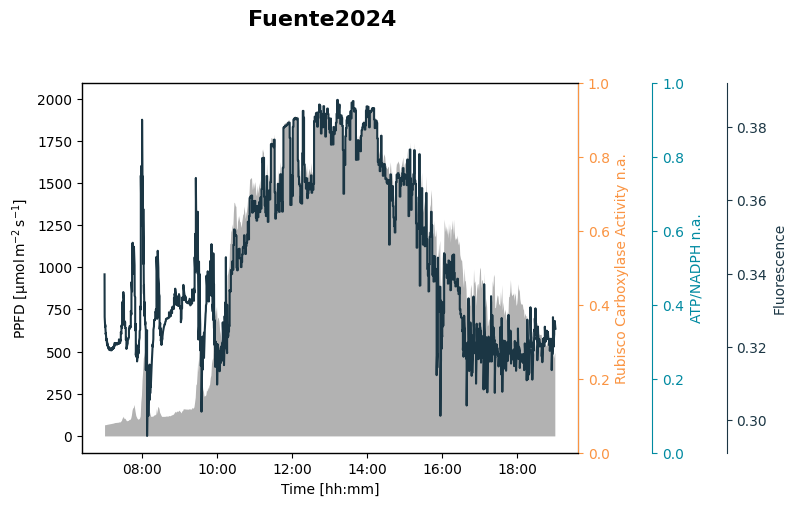

In [3]:
create_day_simulation_fig(
    model=Fuente2024(),
    pfd=pfd_str,
    vc=vc_str,
    atp=atp_str,
    nadph=nadph_str,
    flourescence=flourescence_str,
)

save_fig("daysimulation", add_name=True)

# FvCB Comparision

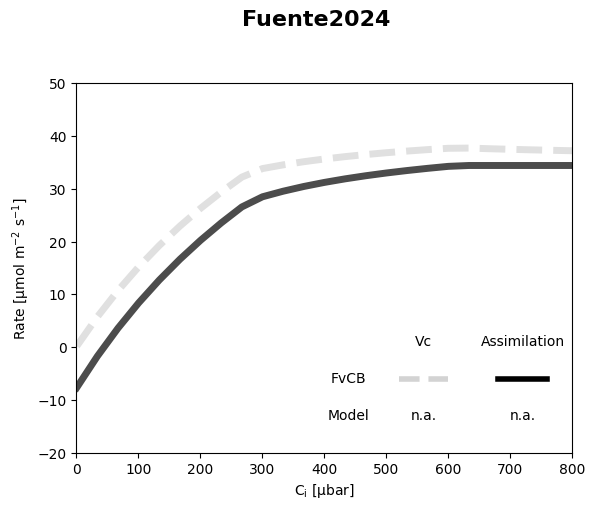

In [4]:
m = Fuente2024()

create_fvcb_fig(
    model=m,
    pfd=pfd_str,
    co2=co2_str,
    vc=vc_str,
    pco2=pco2_str,
    H_cp_co2=H_cp_co2_str,
    gammastar=gammastar_str,
    r_light=r_light_str,
    A=A_str,
    tend_quasi=tend_quasi
)

save_fig("fvcb", add_name=True)

# PAM Sample

Trying pam-simulation with 100 time points per step.


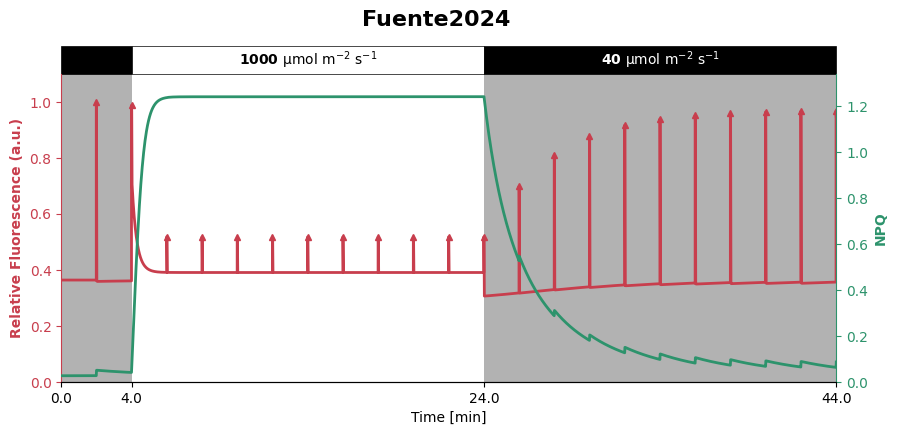

In [5]:
create_pam_fig(
    model=Fuente2024(),
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str=npq_str,
)

save_fig("pam", add_name=True)

# Photosynthesis MCA

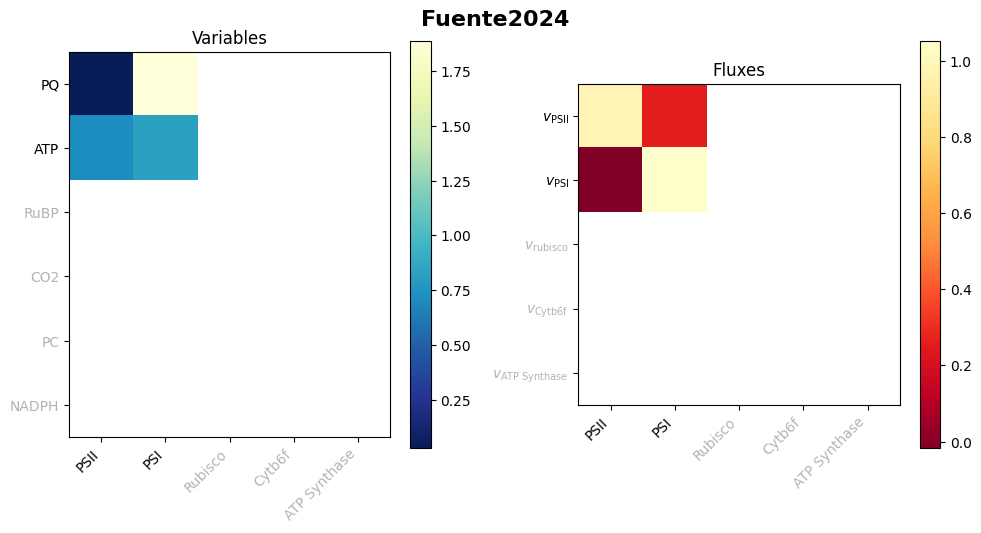

In [6]:
create_mca_fig(
    model=Fuente2024(),
    coeff_psii=coeff_psii_str,
    coeff_psi=coeff_psi_str,
    coeff_rubisco=coeff_rubisco_str,
    coeff_cytb6f=coeff_cytb6f_str,
    coeff_atp_synthase=coeff_atp_synthase_str,
    rubp=rubp_str,
    co2=co2_str,
    pq=pq_str,
    pc=pc_str,
    atp=atp_str,
    nadph=nadph_str,
    v_rubisco=vc_str,
    v_psii=v_psii_str,
    v_psi=v_psi_str,
    v_cytb6f=v_cytb6f_str,
    v_atp_synthase=v_atp_synthase_str,
)

save_fig("mca", add_name=True)

# PAM Fitting

100%|██████████| 31/31 [00:04<00:00,  6.68it/s]


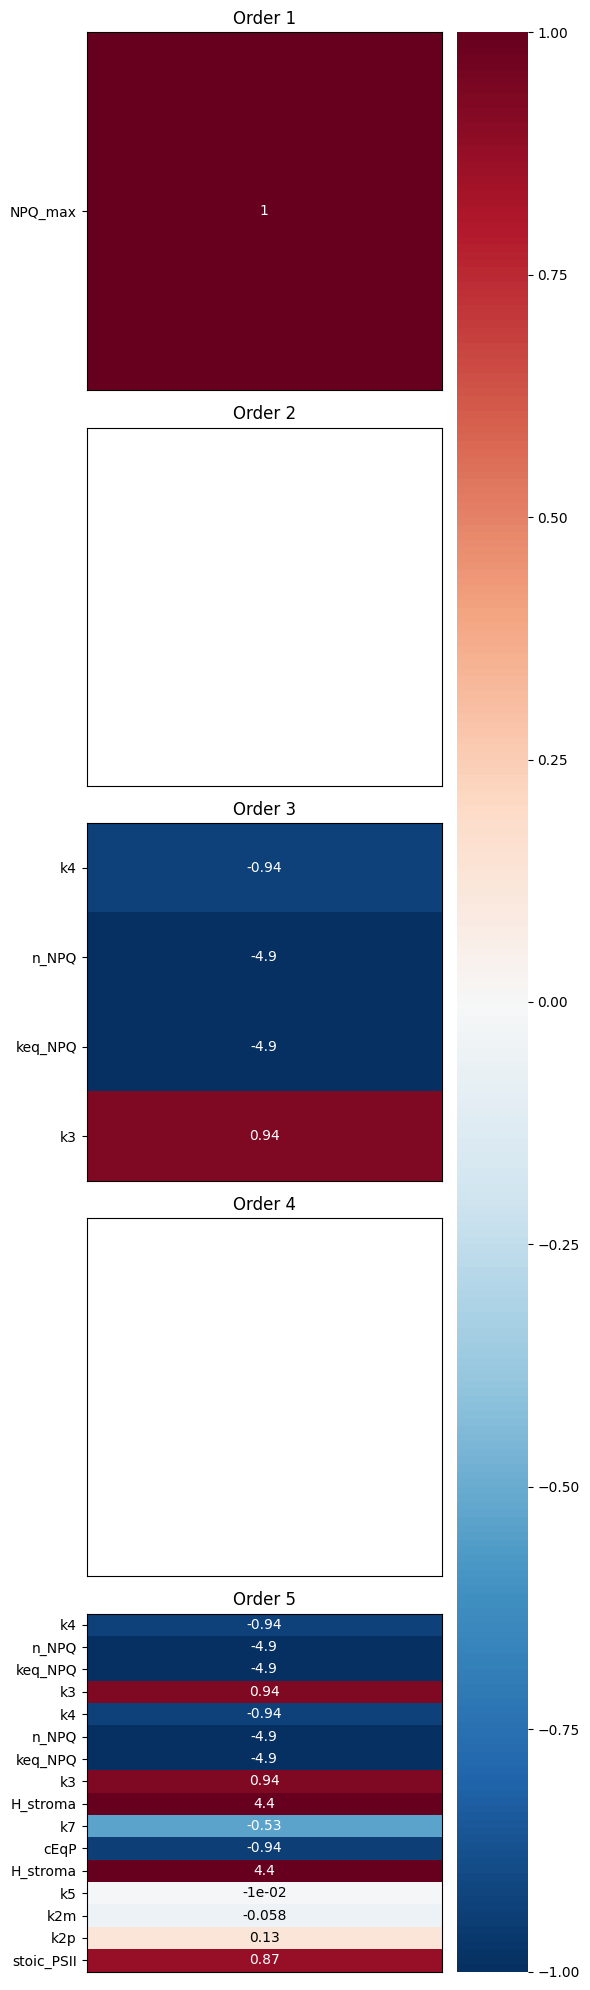

In [7]:
from GreenSlothUtils.demonstration.utils import find_params_to_fit_byorder

find_params_to_fit_byorder(
    to_fit_str=npq_str,
    model=Fuente2024(),
)

Trying pam-simulation with 100 time points per step.


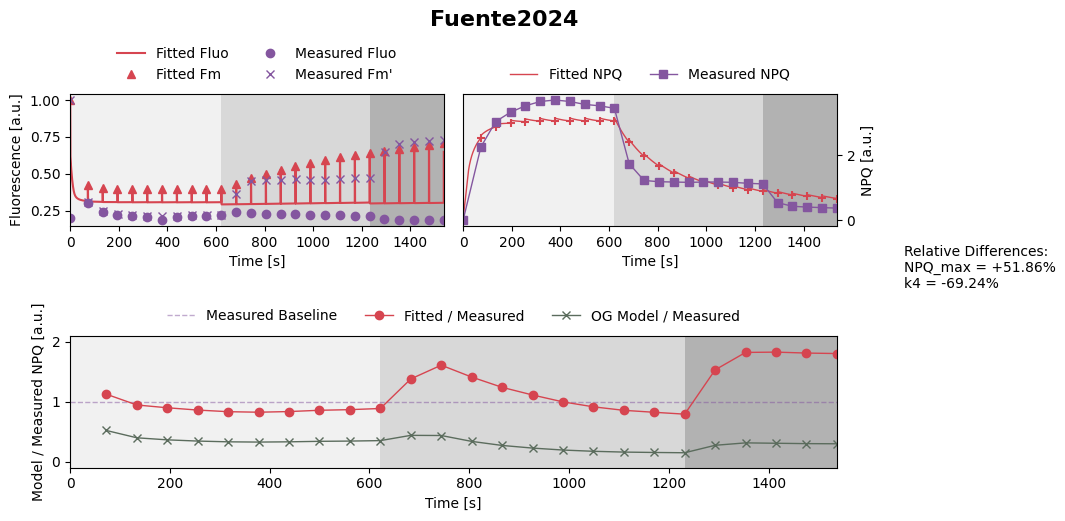

In [8]:
create_pamfit(
    model=Fuente2024(),
    pfd_str=pfd_str,
    flourescence_str=flourescence_str,
    npq_str=npq_str,
    pam_params_to_fit=["NPQ_max", "k4"],
)

save_fig("fitting", add_name=True)